In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
class solveU:
    """Decided to make a class containing my solution for various h, just for a bit of practice."""
    def __init__(self,h=1):
        """Compute domain"""
        self.h = h
        self.x1 = np.arange(0,1,h)
        self.x2 = np.arange(0,1,h)
        
    def f(self):
        """Compute data, f(x1,x2)"""
        f1 = np.outer(np.sin(math.pi*self.x1[:-1]),np.sin(math.pi*self.x2[:-1]))
        f2 = np.outer(np.sin(math.pi*self.x1[:-1]),np.sin(2*math.pi*self.x2[:-1]))
        return f1 + f2
    
    def u(self):
        """Compute the exact solution, u(x1,x2)"""
        u1 = (1/(2*math.pi**2))*np.outer(np.sin(math.pi*self.x1),np.sin(math.pi*self.x2))
        u2 = (1/(5*math.pi**2))*np.outer(np.sin(math.pi*self.x1),np.sin(2*math.pi*self.x2))
        return (u1 + u2)[:-1,:-1]  
    
    def U(self):
        """Compute the finite diff solution, U(x1,x2)"""
        # A1d: Matrix operator for laplacian in 1D 
        A1d = (1/self.h**2)*(2*np.diag(np.ones(int(1/self.h)-1),0) 
                             - np.diag(np.ones(int(1/self.h)-2),1)  
                             - np.diag(np.ones(int(1/self.h)-2),-1))
        # A2d: Matrix operator for laplacian in 2D
        A2d = np.kron(A1d,np.eye(int(1/self.h)-1)) + np.kron(np.eye(int(1/self.h)-1),A1d)
        # U: finite diff solution
        U = np.reshape(np.linalg.inv(A2d)@self.f().flatten(),(int(1/self.h)-1,int(1/self.h)-1))
        return U
    
    def error(self):
        return self.U() - self.u()
        

In [12]:
U10 = solveU(1/10)
U20 = solveU(1/20)



# Plots of h=1/10

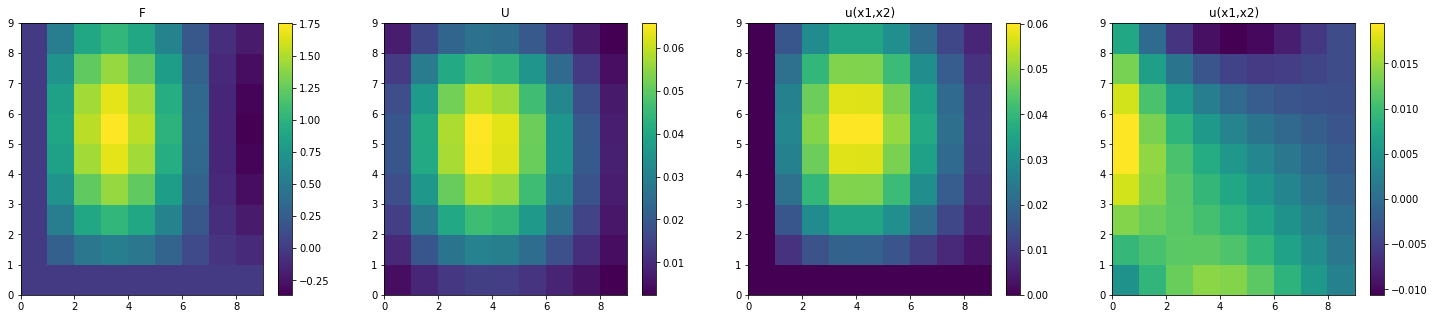

In [13]:
fig = plt.figure(figsize=(25,5))
gs = gridspec.GridSpec(nrows=1,ncols=4)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])

im0 = ax0.pcolor(U10.f())
ax0.set_title("F")
fig.colorbar(im0, ax=ax0)

im1 = ax1.pcolor(U10.U())
ax1.set_title("U")
fig.colorbar(im1, ax=ax1)

im2 = ax2.pcolor(U10.u())
ax2.set_title("u(x1,x2)")
fig.colorbar(im2, ax=ax2)

im3 = ax3.pcolor(U10.U() - U10.u())
ax3.set_title("u(x1,x2)")
fig.colorbar(im3, ax=ax3)

plt.show()
plt.close()

# Plots of h=1/20

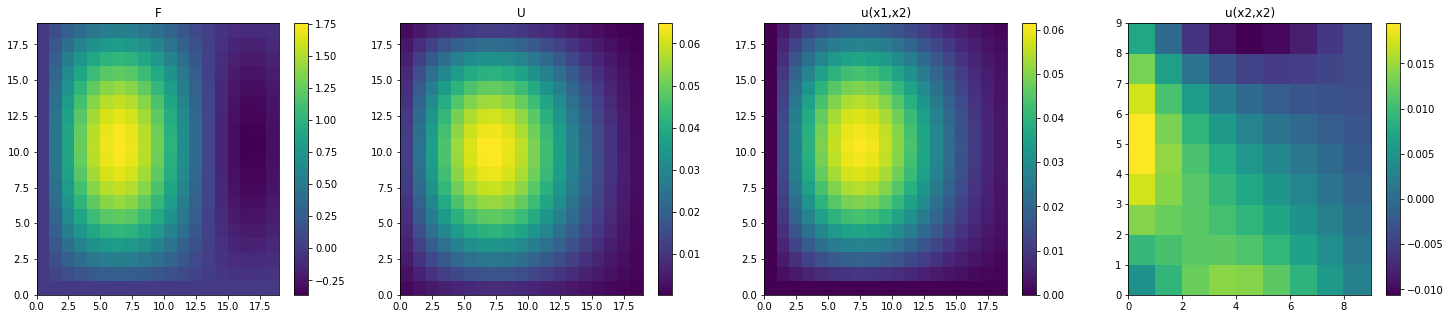

In [14]:
fig = plt.figure(figsize=(25,5))
gs = gridspec.GridSpec(nrows=1,ncols=4)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])

im0 = ax0.pcolor(U20.f())
ax0.set_title("F")
fig.colorbar(im0, ax=ax0)

im1 = ax1.pcolor(U20.U())
ax1.set_title("U")
fig.colorbar(im1, ax=ax1)

im2 = ax2.pcolor(U20.u())
ax2.set_title("u(x1,x2)")
fig.colorbar(im2, ax=ax2)

im3 = ax3.pcolor(U10.U() - U10.u())
ax3.set_title("u(x2,x2)")
fig.colorbar(im3, ax=ax3)

plt.show()
plt.close()

# Error for h=1/10 and h=1/20, respectively

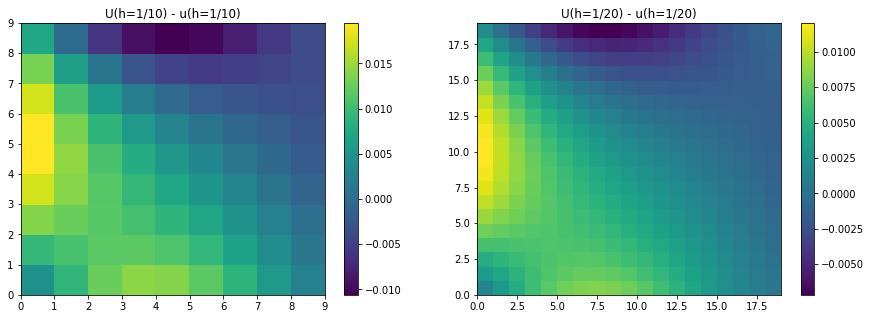

Error at (0.5,0.5) for h=1/10:  0.000979760777385652
Error at (0.5,0.5) for h=1/20:  0.00152776124627918
Error at (0.5,0.5) w/ Richardson approx:  0.002075761715172708


In [15]:
## Plots ##

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(nrows=1,ncols=2)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

im0 = ax0.pcolor(U10.U() - U10.u())
ax0.set_title("U(h=1/10) - u(h=1/10)")
fig.colorbar(im0, ax=ax0)

im1 = ax1.pcolor(U20.U() - U20.u())
ax1.set_title("U(h=1/20) - u(h=1/20)")
fig.colorbar(im1, ax=ax1)

plt.show()
plt.close()

## Error ##
error10 = U10.error()
error20 = U20.error()
richardson_error = (2*U20.U()[10,10]- U10.U()[5,5]) - U20.u()[10,10]
print("Error at (0.5,0.5) for h=1/10: ", error10[5,5])
print("Error at (0.5,0.5) for h=1/20: ", error20[10,10])
print("Error at (0.5,0.5) w/ Richardson approx: ",richardson_error)

# Take a look to see when I start getting better approximations

In [16]:
U_dict = {}
for i in range(10,91,10):
    h = 1/i
    U_dict["U"+str(i)] = solveU(h)
    print("Error at (0.5,0.5) for h=1/"+str(i)+": ", U_dict["U"+str(i)].error()[int(i/2),int(i/2)])


Error at (0.5,0.5) for h=1/10:  0.000979760777385652
Error at (0.5,0.5) for h=1/20:  0.00152776124627918
Error at (0.5,0.5) for h=1/30:  0.0012462119981951209
Error at (0.5,0.5) for h=1/40:  0.0010192305256728484
Error at (0.5,0.5) for h=1/50:  0.0008557272321708942
Error at (0.5,0.5) for h=1/60:  0.0007354232837950558
Error at (0.5,0.5) for h=1/70:  0.000643984218713485
Error at (0.5,0.5) for h=1/80:  0.000572404313132005
Error at (0.5,0.5) for h=1/90:  0.000514958147268936


In [17]:
for i in range(20,91,10):
    U2 = U_dict["U"+str(i)]
    U1 = U_dict["U"+str(i-10)]
    richardson_error = (2*U2.U()[int(i/2),int(i/2)]- U1.U()[int((i-10)/2),int((i-10)/2)]) - U2.u()[int(i/2),int(i/2)]  
    print("Richardson Error for Uh"+str(i)+" - Uh"+str(i-10)+": ", richardson_error)

Richardson Error for Uh20 - Uh10:  0.002075761715172708
Richardson Error for Uh30 - Uh20:  0.0009646627501110616
Richardson Error for Uh40 - Uh30:  0.000792249053150576
Richardson Error for Uh50 - Uh40:  0.0006922239386689399
Richardson Error for Uh60 - Uh50:  0.0006151193354192175
Richardson Error for Uh70 - Uh60:  0.0005525451536319143
Richardson Error for Uh80 - Uh70:  0.000500824407550525
Richardson Error for Uh90 - Uh80:  0.000457511981405867
